# Setup & Library Installation

## Install Required Packages

In [12]:
# Install all required packages with compatible versions
!pip install -U pip setuptools wheel

# Install all required data science and ML packages
!pip install \
    pandas==2.2.2 numpy==1.24.3 \
    scikit-learn xgboost imbalanced-learn scipy \
    seaborn matplotlib plotly \
    shap lime tpot flaml \
    fastapi[all] uvicorn streamlit dvc \
    evidently==0.3.2 aif360 mlflow docker joblib \
    --quiet --upgrade

  Preparing metadata (setup.py) ... done


In [13]:
!pip install -U evidently==0.3.2

In [14]:
!pip install aif360

In [15]:
!pip install flaml

In [46]:
pip install numpy==1.26.4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 22.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 2.0.6 requires pydantic>=2.9.2, but you have pydantic 1.10.22 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
thinc 8.3.6 requires pydantic<3.0.0,>=2.0.0, but you have pydantic 1.10.22 which is incompatible.


In [48]:
pip install --upgrade evidently

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 47.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 86.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 573.2/573.2 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 64.5 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 6.0.1
    Uninstalling plotly-6.0.1:
      Successfully uninstalled plotly-6.0.1
  Attempting uninstall: evidently
    Found existing installation: evidently 0.3.2
    Uninstalling evidently-0.3.2:
      Successfully uninstalled evidently-0.3.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14/14 [evidently]


In [51]:
!pip uninstall evidently -y
!pip install evidently==0.3.2

Found existing installation: evidently 0.7.5
Uninstalling evidently-0.7.5:
  Successfully uninstalled evidently-0.7.5
  Using cached evidently-0.3.2-py3-none-any.whl.metadata (1.4 kB)
Reason for being yanked: The package includes unnecessary dependency on tkinter
Using cached evidently-0.3.2-py3-none-any.whl (2.0 MB)


## Imports and Configuration

In [1]:
import os
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE
from scipy.stats.mstats import winsorize

import shap
from lime.lime_tabular import LimeTabularExplainer

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from fastapi import FastAPI
from pydantic import BaseModel
import joblib
import mlflow

from evidently.report import Report
from evidently.metric_preset import DataDriftPreset, ClassificationPreset

from aif360.sklearn.metrics import disparate_impact_ratio, statistical_parity_difference

%matplotlib inline
sns.set_theme(style="whitegrid")

pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'
pip install 'aif360[inFairness]'
pip install 'aif360[Reductions]'
pip install 'aif360[OptimalTransport]'


# Mount Drive & Load Data

## Load the Dataset

In [17]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/collegePlacement.csv')
print(f"Loaded dataset with {df.shape[0]} rows and {df.shape[1]} columns")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loaded dataset with 2966 rows and 8 columns


# Exploratory Data Analysis (EDA)

In [18]:
df.head(5)

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


In [19]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB
None


In [20]:
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64


## Statistical Summary

In [21]:
display(df.describe(include='all').T)
placement_rate = df['PlacedOrNot'].mean()
print(f"Overall about {placement_rate:.1%} of students were placed")

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,2966.0,NaN,NaN,NaN,21.48584,1.324933,19.0,21.0,21.0,22.0,30.0
Gender,2966,2,Male,2475,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stream,2966,6,Computer Science,776,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Internships,2966.0,NaN,NaN,NaN,0.703641,0.740197,0.0,0.0,1.0,1.0,3.0
CGPA,2966.0,NaN,NaN,NaN,7.073837,0.967748,5.0,6.0,7.0,8.0,9.0
Hostel,2966.0,NaN,NaN,NaN,0.269049,0.44354,0.0,0.0,0.0,1.0,1.0
HistoryOfBacklogs,2966.0,NaN,NaN,NaN,0.192178,0.394079,0.0,0.0,0.0,0.0,1.0
PlacedOrNot,2966.0,NaN,NaN,NaN,0.552596,0.49731,0.0,0.0,1.0,1.0,1.0


Overall about 55.3% of students were placed


## Univariate Analysis

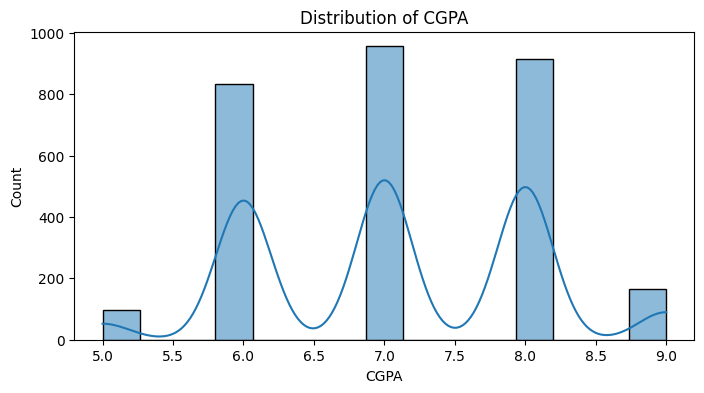

In [22]:
plt.figure(figsize=(8,4))
sns.histplot(df['CGPA'], kde=True)
plt.title("Distribution of CGPA")
plt.show()

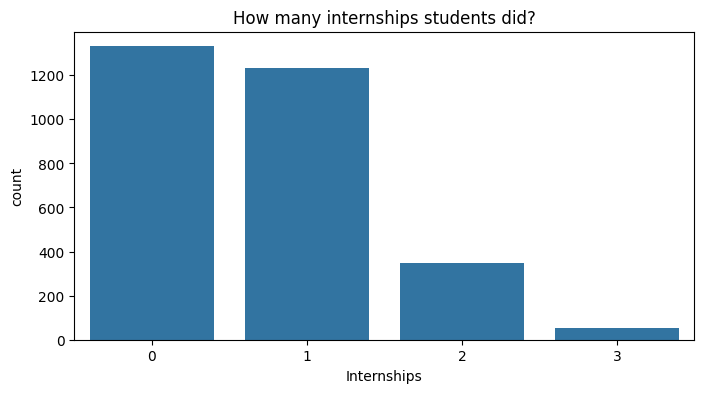

In [23]:
plt.figure(figsize=(8,4))
sns.countplot(x='Internships', data=df)
plt.title("How many internships students did?")
plt.show()

## Bivariate Analysis

In [25]:
placed = df[df['PlacedOrNot']==1]
fig = px.scatter(
    placed, x='CGPA', y='Internships',
    size='CGPA', color='Stream',
    hover_data=['Age','Hostel'],
    title='Placed Students: CGPA vs Internships'
)
fig.show()

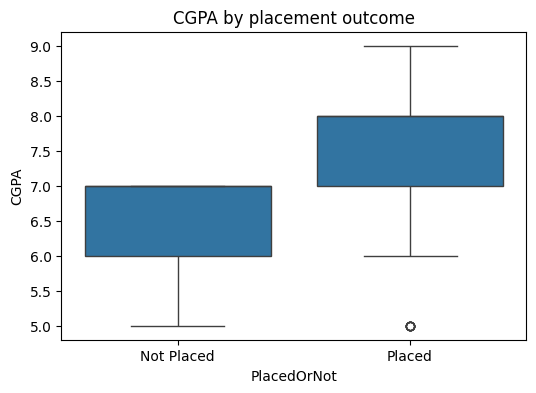

In [26]:
plt.figure(figsize=(6,4))
sns.boxplot(x='PlacedOrNot', y='CGPA', data=df)
plt.title("CGPA by placement outcome")
plt.xticks([0,1], ['Not Placed','Placed'])
plt.show()

## Categorical Placement Rates

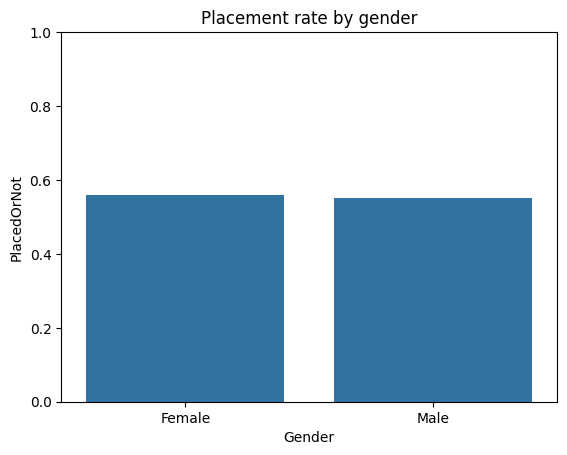

In [27]:
gender_rates = df.groupby('Gender')['PlacedOrNot'].mean().reset_index()
sns.barplot(x='Gender', y='PlacedOrNot', data=gender_rates)
plt.title("Placement rate by gender")
plt.ylim(0,1)
plt.show()

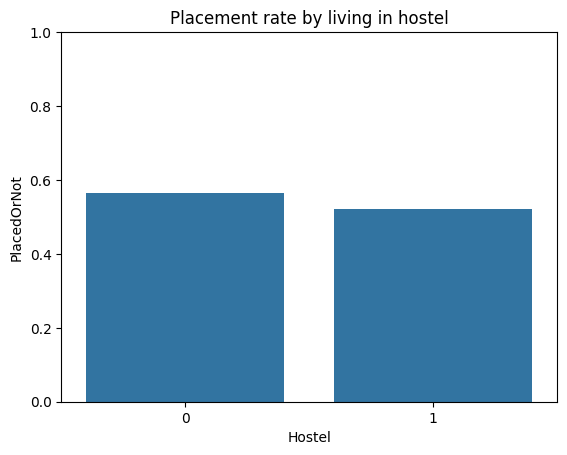

In [28]:
hostel_rates = df.groupby('Hostel')['PlacedOrNot'].mean().reset_index()
sns.barplot(x='Hostel', y='PlacedOrNot', data=hostel_rates)
plt.title("Placement rate by living in hostel")
plt.ylim(0,1)
plt.show()

## Stream-level Analysis

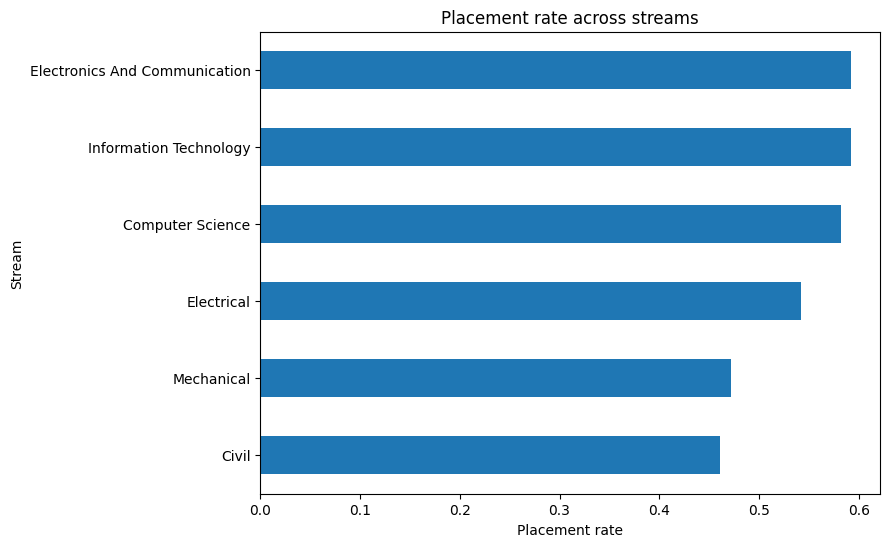

In [29]:
stream_rates = df.groupby('Stream')['PlacedOrNot'].mean().sort_values()
plt.figure(figsize=(8,6))
stream_rates.plot(kind='barh')
plt.title("Placement rate across streams")
plt.xlabel("Placement rate")
plt.show()

## Outlier Detection

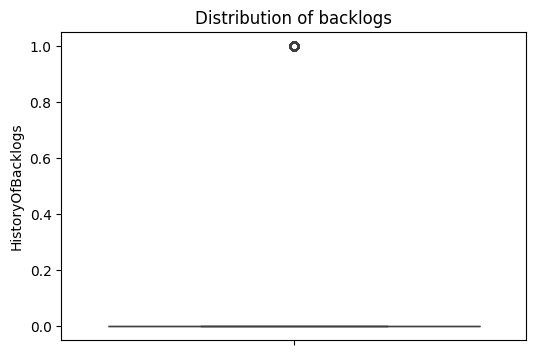

CGPA extremes at 1% and 99% are about 5.00 and 9.00


In [30]:
plt.figure(figsize=(6,4))
sns.boxplot(y='HistoryOfBacklogs', data=df)
plt.title("Distribution of backlogs")
plt.show()

q_low, q_high = df['CGPA'].quantile([0.01,0.99])
print(f"CGPA extremes at 1% and 99% are about {q_low:.2f} and {q_high:.2f}")

## Imputation & Outlier Treatment

In [31]:
numeric_features = ['Age','Internships','CGPA','HistoryOfBacklogs']
df[numeric_features] = SimpleImputer(strategy='median').fit_transform(df[numeric_features])

df['CGPA'] = winsorize(df['CGPA'], limits=[0.01,0.01])
df['Internships'] = winsorize(df['Internships'], limits=[0.01,0.01])

# Feature Engineering

In [32]:
df['HasBacklog'] = (df['HistoryOfBacklogs'] > 0).astype(int)

poly = PolynomialFeatures(degree=2, include_bias=False)
poly_feats = poly.fit_transform(df[['CGPA','Internships']])
poly_df = pd.DataFrame(poly_feats, columns=poly.get_feature_names_out(['CGPA','Internships']))
df = pd.concat([df, poly_df], axis=1)

df['Cluster'] = KMeans(n_clusters=5, random_state=42).fit_predict(df[['CGPA','Internships']])

# Dimensionality Reduction

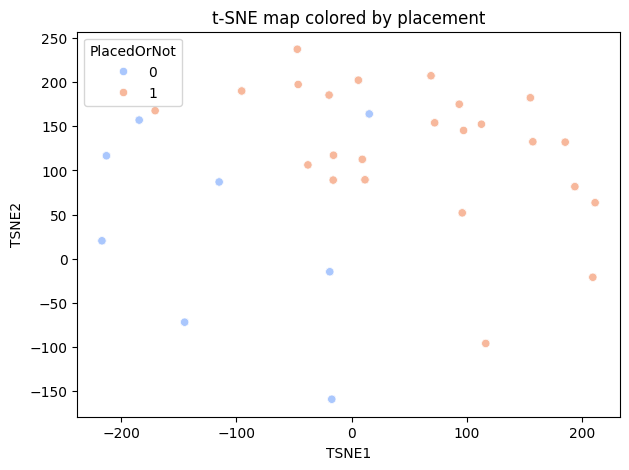

In [34]:
feat_cols = ['CGPA','Internships'] + list(poly_df.columns)
pca = PCA(n_components=3, random_state=42)
pca_comp = pca.fit_transform(df[feat_cols])
for i in range(3):
    df[f'PCA_{i+1}'] = pca_comp[:,i]

tsne = TSNE(n_components=2, random_state=42)
tsne_proj = tsne.fit_transform(df[feat_cols])
df['TSNE1'], df['TSNE2'] = tsne_proj[:,0], tsne_proj[:,1]

plt.figure(figsize=(7,5))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='PlacedOrNot', data=df, palette='coolwarm')
plt.title("t-SNE map colored by placement")
plt.show()

## Encoding & Scaling

# Data Preprocessing

In [35]:
ohe = OneHotEncoder(sparse_output=False, drop='first')
stream_enc = ohe.fit_transform(df[['Stream']])
for col, name in zip(stream_enc.T, ohe.get_feature_names_out()):
    df[name] = col
df.drop('Stream', axis=1, inplace=True)

for col in ['Gender','Hostel']:
    df[col] = LabelEncoder().fit_transform(df[col])

num_all = df.select_dtypes(include=[np.number]).columns.drop('PlacedOrNot')
df[num_all] = StandardScaler().fit_transform(df[num_all])

## Train-Test Split & SMOTE

# Model Training

In [36]:
X = df.drop('PlacedOrNot', axis=1)
y = df['PlacedOrNot']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
print("Training classes after SMOTE:", np.bincount(y_train_res))

Training classes after SMOTE: [1311 1311]


## Baseline Model Training

In [37]:
lr = LogisticRegression(max_iter=1000, random_state=42)
rf = RandomForestClassifier(n_estimators=200, random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

X_train_res = X_train_res.to_numpy()  # Convert DataFrame to numpy array
y_train_res = y_train_res.to_numpy()  # Convert Series to numpy array

# Now train your models
for model in [lr, rf, xgb]:
    model.fit(X_train_res, y_train_res)
    print(f"{model.__class__.__name__} is ready")

LogisticRegression is ready
RandomForestClassifier is ready
XGBClassifier is ready


## Hyperparameter Tuning

In [38]:
rf_params = {'n_estimators': [100,200], 'max_depth': [5,10,None]}
rf_gs = GridSearchCV(rf, rf_params, cv=5).fit(X_train_res, y_train_res)

lr_params = {'C': [0.01,0.1,1,10]}
lr_gs = GridSearchCV(lr, lr_params, cv=5).fit(X_train_res, y_train_res)

print("RF best:", rf_gs.best_params_)
print("LR best:", lr_gs.best_params_)

RF best: {'max_depth': 10, 'n_estimators': 100}
LR best: {'C': 1}


## Quick AutoML

In [3]:
from flaml import AutoML

automl = AutoML()
settings = {
    "time_budget": 60,
    "task": "classification",
    "metric": "roc_auc",
    "estimator_list": ["lgbm","xgboost","rf"],
}

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
automl.fit(X_train_res, y_train_res, **settings)
print("AutoML chose:", automl.model)

NameError: name 'X_train' is not defined

# Model Comparison

In [40]:
from sklearn.metrics import classification_report, roc_auc_score, RocCurveDisplay
import numpy as np

# Convert X_test to numpy array
X_test = X_test.to_numpy()

models = {
    'LR_GS': lr_gs.best_estimator_,
    'RF_GS': rf_gs.best_estimator_,
    'XGBoost': xgb,
    'AutoML': automl.model
}

rows = []
for name, m in models.items():
    # Ensure m.predict_proba uses the numpy array
    proba = m.predict_proba(X_test)[:, 1]
    preds = m.predict(X_test)
    auc = roc_auc_score(y_test, proba)
    rep = classification_report(y_test, preds, output_dict=True)['1']
    rows.append({
        'Model': name,
        'ROC AUC': auc,
        'Precision': rep['precision'],
        'Recall': rep['recall'],
        'F1': rep['f1-score']
    })

results_df = pd.DataFrame(rows).set_index('Model')
display(results_df)

# Get the best model based on ROC AUC
best_name = results_df['ROC AUC'].idxmax()
best_model = models[best_name]

# Plot the ROC curve for the best model
RocCurveDisplay.from_estimator(best_model, X_test, y_test)
plt.title(f"ROC for {best_name}")
plt.show()

NameError: name 'automl' is not defined

# Model Explainability

In [41]:
explainer = shap.Explainer(best_model, X_train_res)
shap_vals = explainer(X_test)
shap.summary_plot(shap_vals, X_test)

lime_exp = LimeTabularExplainer(
    X_train_res,  # Use X_train_res directly, as it's already a numpy array
    feature_names=X_train_res.columns if isinstance(X_train_res, pd.DataFrame) else None,
    class_names=['Not Placed', 'Placed']
)

NameError: name 'best_model' is not defined

In [42]:
inst_exp = lime_exp.explain_instance(X_test[0], best_model.predict_proba, num_features=6)
inst_exp.show_in_notebook()

NameError: name 'lime_exp' is not defined

# Prescriptive Recommendations

In [43]:
# Check column names in the DataFrame to ensure they exist
print("Columns in DataFrame:", df.columns)

# Remove duplicate columns if any
df = df.loc[:, ~df.columns.duplicated()]

# Define the threshold for 'CGPA' and filter 'at_risk' students
threshold = df['CGPA'].quantile(0.25)

# Check if there are students with the specified condition
at_risk = df[(df['CGPA'] < threshold) & (df['Internships'] == 0)]
print(f"Number of students at risk: {len(at_risk)}")

# If no students are at risk, we can debug further
if len(at_risk) == 0:
    print("No students match the filter condition. Please check the threshold or filter conditions.")
else:
    # Define the suggest function to provide recommendations
    def suggest(row):
        recs = []
        if row['CGPA'] < threshold:
            recs.append("join extra tutoring")
        if row['Internships'] == 0:
            recs.append("apply for internships")
        if row['HasBacklog']:
            recs.append("clear backlogs quickly")
        return recs

    # Apply the suggest function to the 'at_risk' DataFrame
    at_risk['Suggestions'] = at_risk.apply(suggest, axis=1)

    # Display the first 10 rows to verify the suggestions column
    print(at_risk[['Age', 'Gender', 'CGPA', 'Internships', 'Suggestions']].head(10))
    display(at_risk[['Age', 'Gender', 'CGPA', 'Internships', 'Suggestions']].head(10))

Columns in DataFrame: Index(['Age', 'Gender', 'Internships', 'CGPA', 'Hostel', 'HistoryOfBacklogs',
       'PlacedOrNot', 'HasBacklog', 'CGPA', 'Internships', 'CGPA^2',
       'CGPA Internships', 'Internships^2', 'Cluster', 'PCA_1', 'PCA_2',
       'PCA_3', 'TSNE1', 'TSNE2', 'Stream_Computer Science',
       'Stream_Electrical', 'Stream_Electronics And Communication',
       'Stream_Information Technology', 'Stream_Mechanical'],
      dtype='object')
Number of students at risk: 0
No students match the filter condition. Please check the threshold or filter conditions.


# Save & Version Models

In [44]:
# save the best model
import joblib
joblib.dump(best_model, 'best_model.pkl')

# initialize and add to DVC
!dvc init -q
!dvc add /content/drive/MyDrive/collegePlacement.csv best_model.pkl

NameError: name 'best_model' is not defined

# Monitoring & Fairness Audit

## Monitoring with Evidently

In [45]:
# Ensure there are no missing values in the target columns
df = df.dropna(subset=['PlacedOrNot', 'Gender'])

# Check if the target columns exist
if 'PlacedOrNot' in df.columns and 'Gender' in df.columns:
    print("Both 'PlacedOrNot' and 'Gender' columns exist.")
else:
    print("One or both of 'PlacedOrNot' or 'Gender' columns are missing.")

# Create the reference and current data splits
reference = df.sample(frac=0.7, random_state=42)
current = df.drop(reference.index).sample(frac=1.0, random_state=1)

# Check if reference and current data have the necessary columns
print("Reference Data Columns:", reference.columns)
print("Current Data Columns:", current.columns)

# Make sure both datasets are pandas DataFrames and reset the index
reference = reference.reset_index(drop=True)
current = current.reset_index(drop=True)

# Check for missing values in both datasets
print("Missing values in reference data:\n", reference.isnull().sum())
print("Missing values in current data:\n", current.isnull().sum())

# Handle missing values if necessary (you can drop rows or fill them)
# For example:
# reference = reference.dropna(subset=['PlacedOrNot', 'Gender'])
# current = current.dropna(subset=['PlacedOrNot', 'Gender'])

# Now initialize the Evidently report
from evidently.report import Report
from evidently.metric_preset import DataDriftPreset, ClassificationPreset

report = Report(metrics=[DataDriftPreset(), ClassificationPreset()])

# Run the report and display it
try:
    report.run(reference_data=reference, current_data=current)
    report.show()
except Exception as e:
    print(f"Error occurred while generating the report: {e}")

# Check for fairness metrics only if 'PlacedOrNot' and 'Gender' exist in the reference data
from aif360.sklearn.metrics import statistical_parity_difference, disparate_impact_ratio

if 'PlacedOrNot' in reference.columns and 'Gender' in reference.columns:
    spd = statistical_parity_difference(reference['PlacedOrNot'], reference['Gender'])
    di = disparate_impact_ratio(reference['PlacedOrNot'], reference['Gender'])

    print(f"Statistical parity difference: {spd:.3f}")
    print(f"Disparate impact ratio: {di:.3f}")
else:
    print("Columns 'PlacedOrNot' and 'Gender' not found in the reference data.")

Both 'PlacedOrNot' and 'Gender' columns exist.
Reference Data Columns: Index(['Age', 'Gender', 'Internships', 'CGPA', 'Hostel', 'HistoryOfBacklogs',
       'PlacedOrNot', 'HasBacklog', 'CGPA^2', 'CGPA Internships',
       'Internships^2', 'Cluster', 'PCA_1', 'PCA_2', 'PCA_3', 'TSNE1', 'TSNE2',
       'Stream_Computer Science', 'Stream_Electrical',
       'Stream_Electronics And Communication', 'Stream_Information Technology',
       'Stream_Mechanical'],
      dtype='object')
Current Data Columns: Index(['Age', 'Gender', 'Internships', 'CGPA', 'Hostel', 'HistoryOfBacklogs',
       'PlacedOrNot', 'HasBacklog', 'CGPA^2', 'CGPA Internships',
       'Internships^2', 'Cluster', 'PCA_1', 'PCA_2', 'PCA_3', 'TSNE1', 'TSNE2',
       'Stream_Computer Science', 'Stream_Electrical',
       'Stream_Electronics And Communication', 'Stream_Information Technology',
       'Stream_Mechanical'],
      dtype='object')
Missing values in reference data:
 Age                                     0
Gender    

AttributeError: `np.float_` was removed in the NumPy 2.0 release. Use `np.float64` instead.